In [1]:
from train import *

total parameters: 739969


In [2]:
weight = torch.load('./save/weights/100000.dat')
# model.load_state_dict(weight)

In [3]:
evaluate(weight, idx=8)

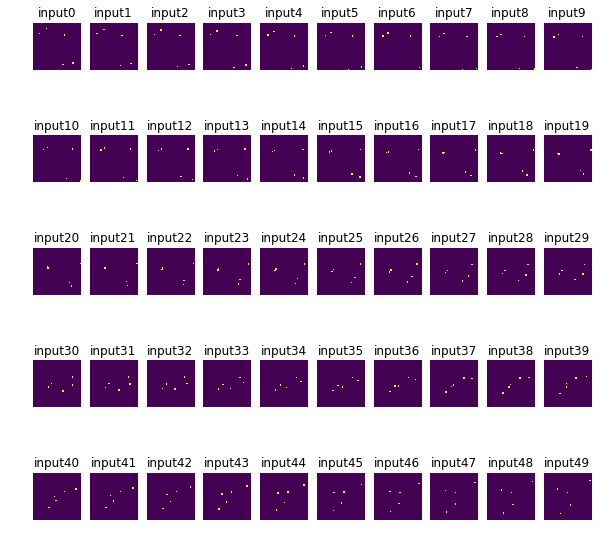

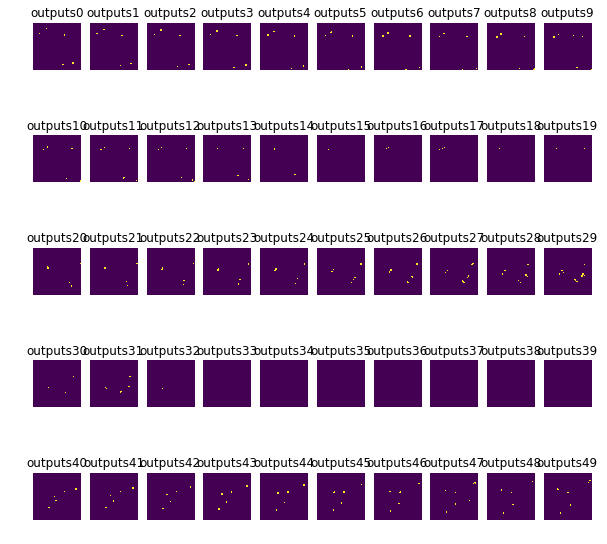

In [4]:
%run get_res.py

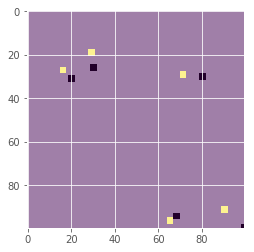

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
x=1
plt.ion()
i=np.array(ips[4])
j=np.array(ips[9])
plt.imshow(i)
x=plt.imshow(j, cmap='Greys', alpha=0.5)
# plt.figure()
# plt.imshow(np.bitwise_xor(i,j))
# np.bitwise_xor(i,j).sum()

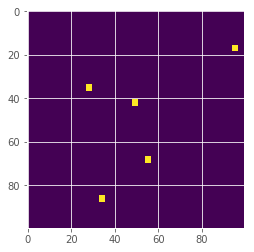

In [6]:
import matplotlib.animation as animation
fig = plt.figure()

ims = []
for i in ips:
    ims.append([plt.imshow(i)])

anim = animation.ArtistAnimation(fig, ims, interval=200, blit=True, repeat_delay=2000)

from IPython.display import HTML
HTML(anim.to_html5_video())


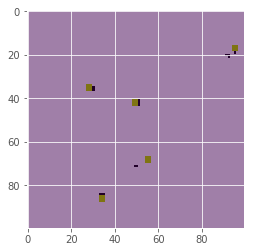

In [7]:
import matplotlib.animation as animation
fig = plt.figure()

ims = []
for i, j in zip(ips, ops):
    im1 = plt.imshow(i)
    im2 = plt.imshow(j, cmap='Greys', alpha=0.5)
    ims.append([im1,im2])

anim = animation.ArtistAnimation(fig, ims, interval=100, blit=True, repeat_delay=2000)

from IPython.display import HTML
# HTML(anim.to_jshtml())
HTML(anim.to_html5_video())

In [43]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
def f(i):
    plt.figure(2,figsize=(8,8))
    x=np.array(ips[i])
    y=np.array(ops[i])
    plt.imshow(x, alpha=0.5)
    plt.imshow(y, cmap='Greys', alpha=0.5)

interactive_plot = interactive(f, i=(0,49))
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot

interactive(children=(IntSlider(value=24, description='i', max=49), Output(layout=Layout(height='500px'))), _d…

In [14]:
input=getSequence(3)
with torch.no_grad():
    output, hidden = model(input)

In [40]:

def show_h(seq,hn,cha):
    fig=plt.figure(3,figsize=(8,8))
    p=plt.imshow(hidden[seq][hn][0,cha].cpu())
    fig.colorbar(p)


interactive_plot = interactive(show_h, seq=(0,49), hn=(0,2),cha=(0,127))
output = interactive_plot.children[-1]
output.layout.height = '800px'
interactive_plot

interactive(children=(IntSlider(value=24, description='seq', max=49), IntSlider(value=1, description='hn', max…